### Notebook description
Comparison of mRNA/protein ratios between different cell conditions. Ratios are calculated from raw data and then log ratios are used (log2(mRNA_raw/proteinAUC_raw)). The ratios are calculate using overlapping genes between all cell conditions. So this shows how the same set of genes between sets are changing.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from itertools import combinations 

#Data class import
import sys
sys.path.append('../Utils')
from data_class import GPY_data

### Load data and utilize data_class from Utils, below shows import features of dataclass
* self.data = pdDF.copy() #pandas dataframe
* self.rna = {} #Dictionary containing dataframe for cell conditions with rows of genes of nonzero mRNA levels
* self.rna_chrm = {} #Dictinoary of data frames filtered for each chromosome, contains all genes with nonzero mRNA
* self.rna_protein = {} #Dictionary containing dataframe for cell conditions with rows of genes of nonzero mRNA and protein levels
* self.rna_protein_chrm = {} #Data frames filtered for each chromosome, contains only nonzero mRNA and protein

In [3]:
#Using different column as the index, 'Gene.desription' and 'Row.names' are not included in GPY_data if not included in features
gp_data = pd.read_csv('../../Data/ProcessedData/GP_data.tsv',sep='\t',index_col=1)

#Always needs avgchrs as a feature since sort off that to get individual chrm data, change in future to auto include this
features = ['AvgChrs']
AT2 = ['AT2_04M_F0','AT2_04M_F10','AT2_18M_F0','AT2_18M_F10']
AM = ['AM_04M_F0','AM_04M_F10','AM_18M_F0','AM_18M_F10']
cell_lines = AT2+AM

data = GPY_data(gp_data,features,cell_lines) #Normalizes gene length
print(data.rna_protein[cell_lines[0]].head())
print(data.rna_protein[cell_lines[0]].shape)

              AvgChrs  AT2_04M_F0  AT2_04M_F0_P
Gene.names                                     
Gnai3        2.675624    7.151432     25.389750
Cox5a        8.461710    5.426985     29.676180
Dlat         8.406494    5.496820     26.982080
Gpr107       1.171243    6.244449     22.902280
Trim25      10.729096    6.358683     24.415022
(3541, 3)


#### Genes that are common across all cell conditions with nonzero mrna and protein levels

In [4]:
gene_names=[]
for cell in cell_lines:
    gene_names.append(set(data.rna_protein[cell].index))
    
intersect_genes = set.intersection(*gene_names)

#### Creating dataframe with ratios using raw values, log2(mRNA/ProteinAUC)

In [5]:
ratios = pd.DataFrame(index=intersect_genes)
for cell in cell_lines:
    #log ratio of raw values log2(mRNA/ProteinAUC)
    ProteinAUC = 2**data.rna_protein[cell][cell+'_P'].loc[intersect_genes]-1
    mRNA = 2**data.rna_protein[cell][cell].loc[intersect_genes]-1
    ratios[cell] = np.log2(ProteinAUC/mRNA)

### Histogram and density plots, bin edges kept constant from here onwards

Text(0.5, 1.0, 'AT2_04M_F0 counts vs AT2_04M_F10')

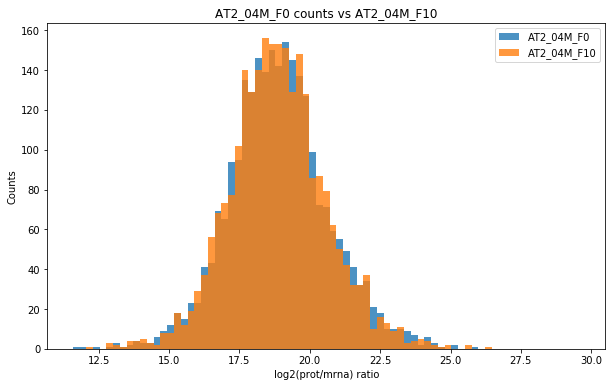

In [6]:
fig = plt.figure()
fig.set_size_inches((10, 6))
ax = fig.add_subplot(111)

#create historgram bins
bin_edges = np.histogram_bin_edges(ratios,bins=75)

ax.hist(ratios[cell_lines[0]],label='AT2_04M_F0',alpha=0.8,bins=bin_edges)
ax.hist(ratios[cell_lines[1]],label='AT2_04M_F10',alpha=0.8,bins=bin_edges)
# ax.hist(np.log2(ratios_raw).loc[:,'AT2_18M_F0_raw'],label='AT2_18M_F0',alpha=0.5,bins=20)
# ax.hist(np.log2(ratios_raw).loc[:,'AT2_18M_F10_raw'],label='AT2_18M_F10',alpha=0.5,bins=20)
ax.legend()
ax.set_xlabel("log2(prot/mrna) ratio")
ax.set_ylabel("Counts")
ax.set_title(f'{cell_lines[0]} counts vs {cell_lines[1]}')

/gpfs/home/dshak/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 1.0, 'AT2_04M_F0 dist plot')

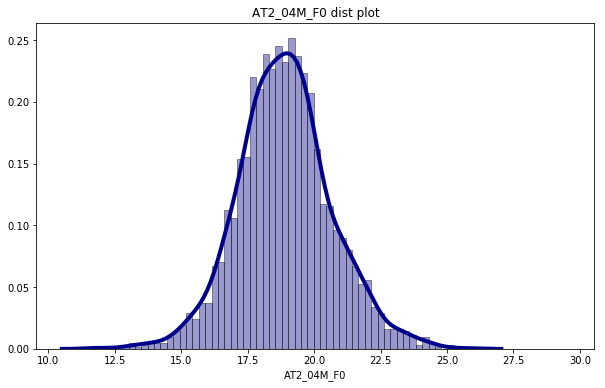

In [7]:
fig = plt.figure()
fig.set_size_inches((10, 6))
ax = fig.add_subplot(111)

sns.distplot(ratios[cell_lines[0]], hist=True, kde=True, 
             bins=bin_edges, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4},
             ax=ax)

ax.set_title(f'{cell_lines[0]} dist plot')

In [8]:
ratios

,AT2_04M_F0,AT2_04M_F10,AT2_18M_F0,AT2_18M_F10,AM_04M_F0,AM_04M_F10,AM_18M_F0,AM_18M_F10
Hsd17b4,20.030240,20.106374,19.936074,19.974341,18.416930,18.586792,18.585578,18.441591
Mccc2,21.846872,21.422425,22.080107,21.725662,17.764953,18.066130,18.684768,17.909557
Thoc6,20.608439,20.591066,20.868776,20.464359,18.825521,18.982730,17.951628,18.457612
Prpsap1,19.434233,19.404828,19.129235,19.567197,18.740289,18.364946,18.361439,18.767067
Msra,19.632989,19.852398,20.042324,19.568729,19.385938,20.268853,19.094540,20.920986
...,...,...,...,...,...,...,...,...
Rer1,18.321499,18.533081,17.994018,18.251568,17.512997,18.660930,17.760481,18.549102
Dnajc9,19.183471,19.984780,18.976275,19.131307,20.458460,20.613606,19.511852,19.733007
Glyr1,17.355369,17.569662,17.380315,17.475304,16.618615,16.730925,16.866054,16.951498
Mlycd,18.738374,18.763774,18.811213,18.410160,17.571696,17.149364,18.814533,18.299922


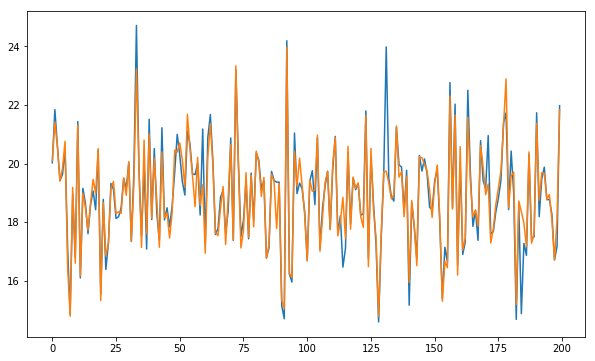

In [9]:
fig = plt.figure()
fig.set_size_inches((10, 6))
ax = fig.add_subplot(111)
ax.plot(ratios['AT2_04M_F0'].values[0:200])
ax.plot(ratios['AT2_04M_F10'].values[0:200])

In [11]:
at2_combinations = list(combinations(cell_lines[0:4],2))
am_combinations = list(combinations(cell_lines[4::],2))

In [12]:
at2_combinations

[('AT2_04M_F0', 'AT2_04M_F10'),
 ('AT2_04M_F0', 'AT2_18M_F0'),
 ('AT2_04M_F0', 'AT2_18M_F10'),
 ('AT2_04M_F10', 'AT2_18M_F0'),
 ('AT2_04M_F10', 'AT2_18M_F10'),
 ('AT2_18M_F0', 'AT2_18M_F10')]

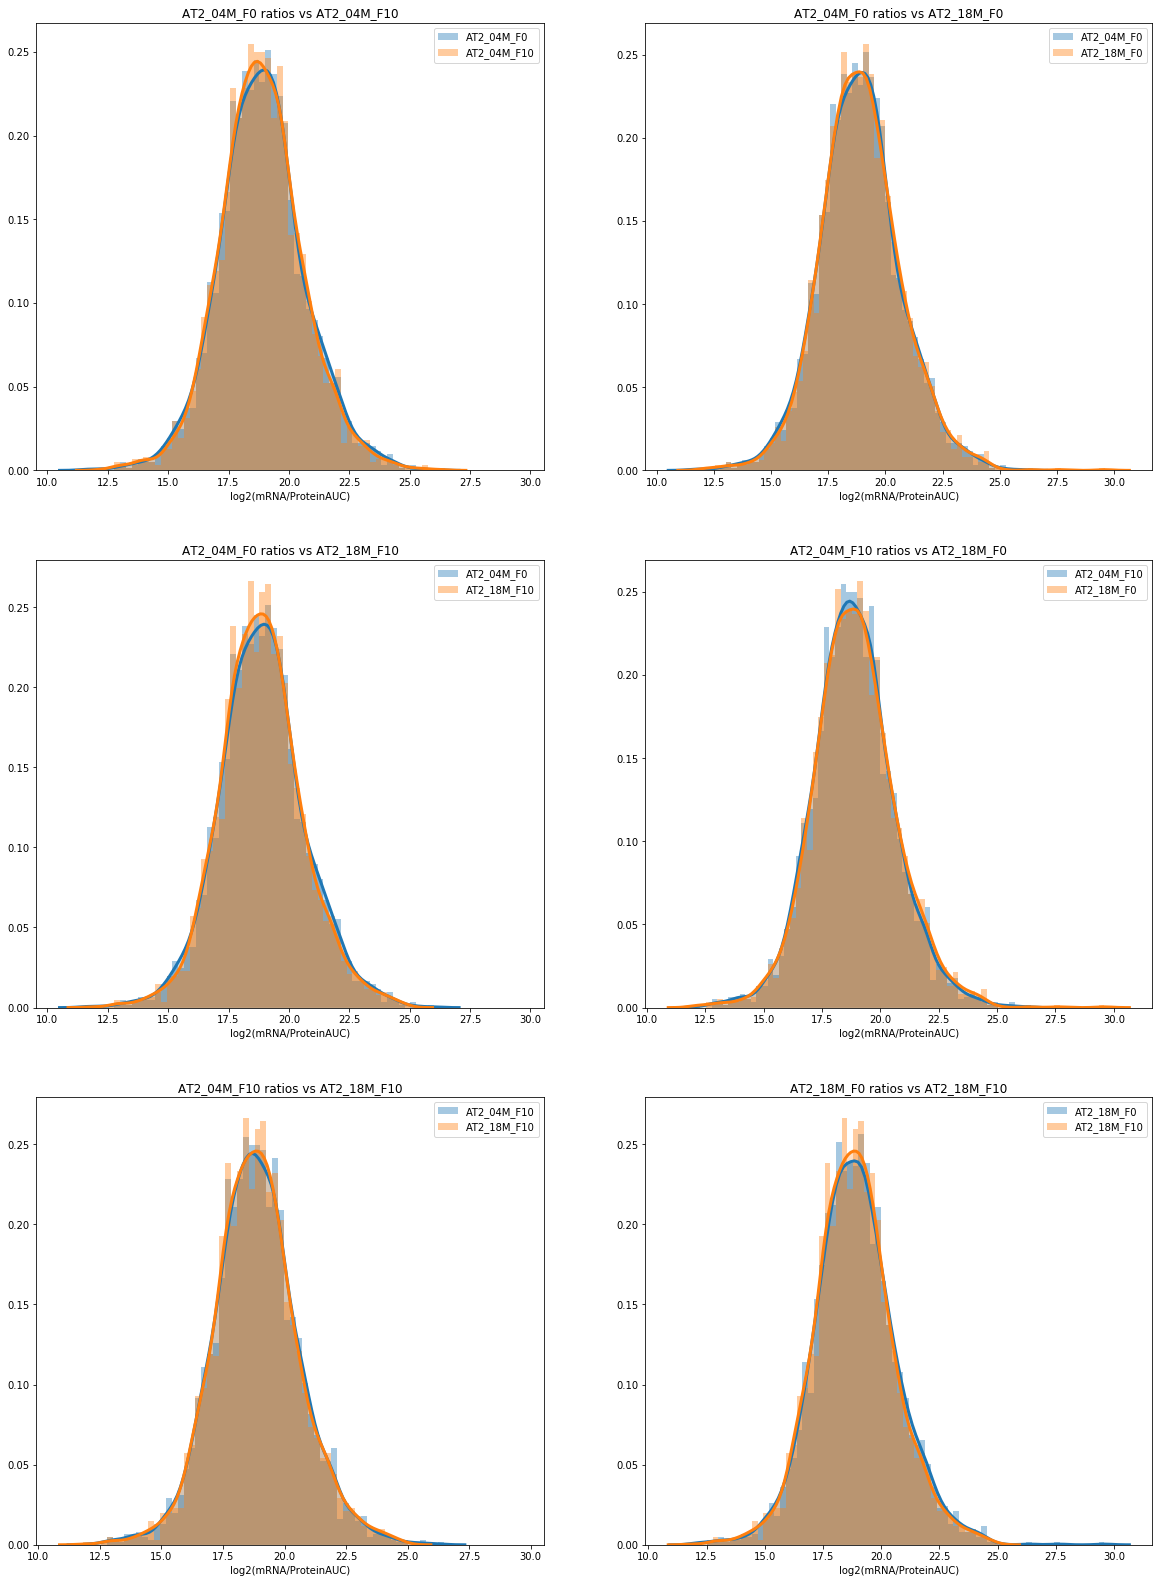

In [9]:
fig, axs = plt.subplots(3,2,figsize=(20,28))
axes = axs.flatten()

for i,compare in enumerate(at2_combinations):
    sns.distplot(ratios[compare[0]],hist=True,kde=True,
                kde_kws = {'shade': True, 'linewidth': 3},
                bins=bin_edges,ax=axes[i],label=compare[0])
    
    sns.distplot(ratios[compare[1]],hist=True,kde=True,
                kde_kws = {'shade': True, 'linewidth': 3},
                bins=bin_edges,ax=axes[i],label=compare[1])
    axes[i].set_title(f'{compare[0]} ratios vs {compare[1]}')
    axes[i].set_xlabel(f'log2(mRNA/ProteinAUC)')
    axes[i].legend()

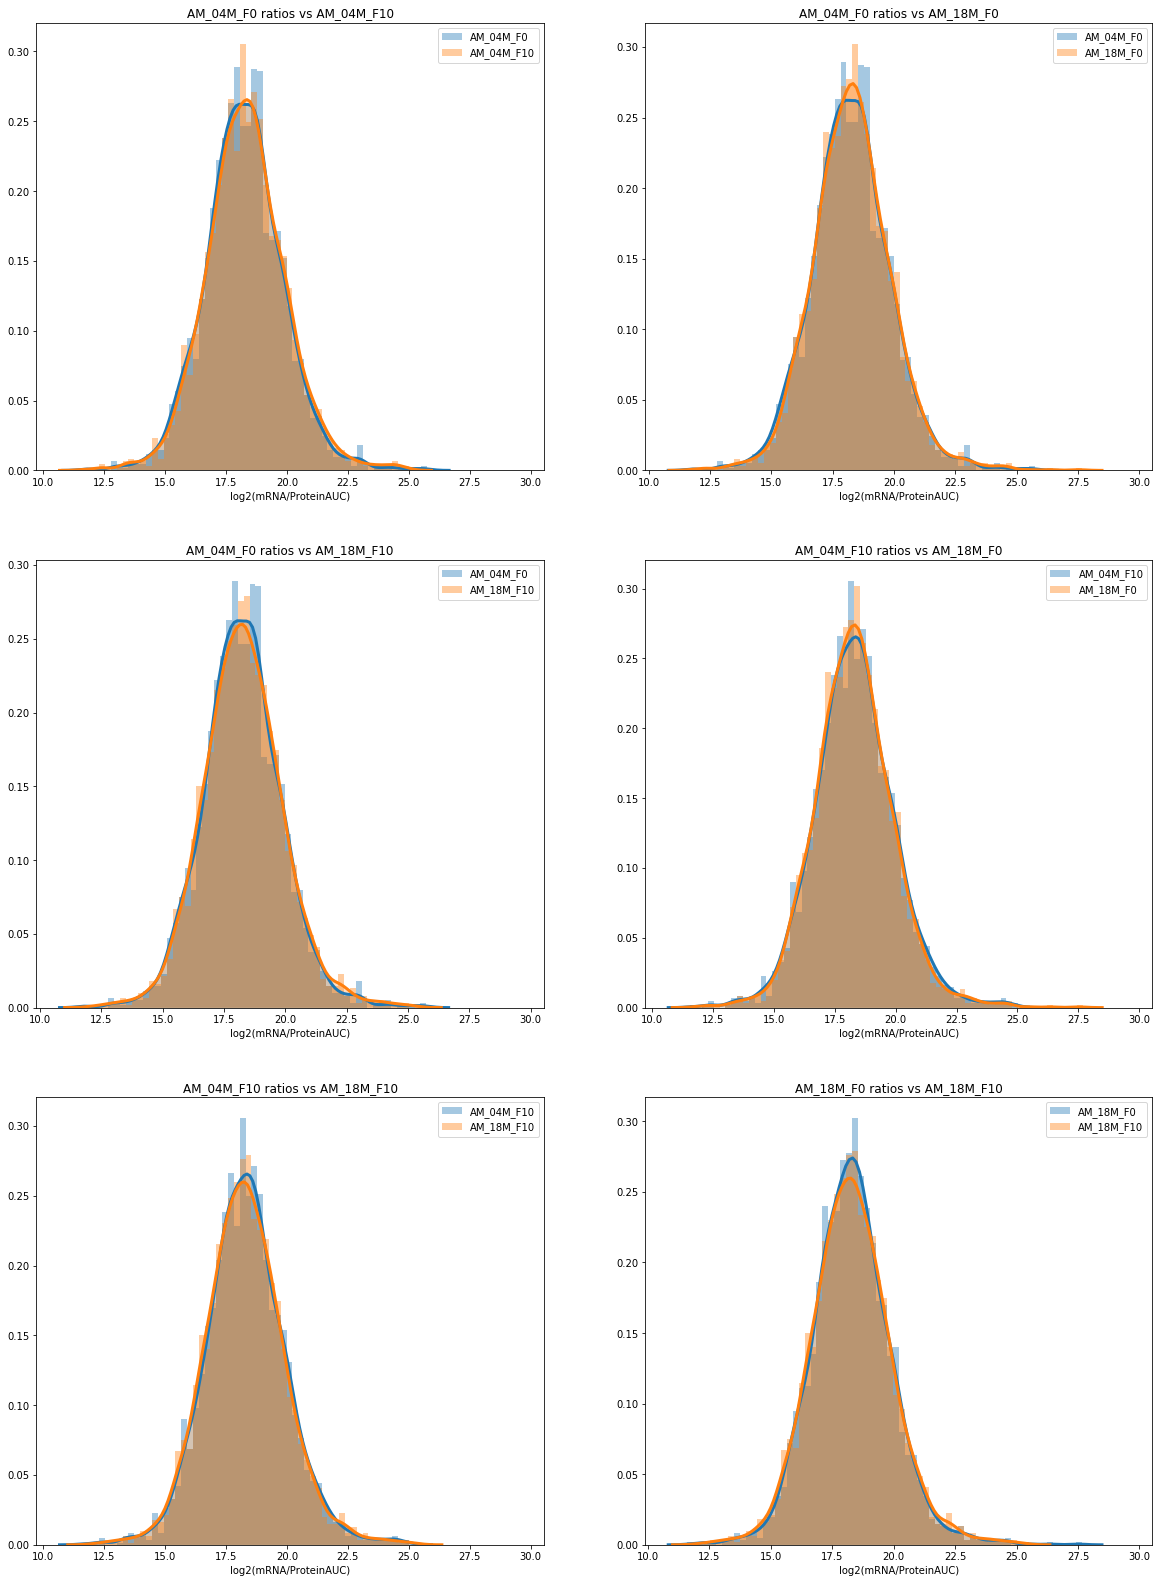

In [10]:
fig, axs_AM = plt.subplots(3,2,figsize=(20,28))
axes_AM = axs_AM.flatten()

for i,compare in enumerate(am_combinations):
    sns.distplot(ratios[compare[0]],hist=True,kde=True,
                kde_kws = {'shade': True, 'linewidth': 3},
                bins=bin_edges,ax=axes_AM[i],label=compare[0])
    
    sns.distplot(ratios[compare[1]],hist=True,kde=True,
                kde_kws = {'shade': True, 'linewidth': 3},
                bins=bin_edges,ax=axes_AM[i],label=compare[1])
    axes_AM[i].set_title(f'{compare[0]} ratios vs {compare[1]}')
    axes_AM[i].set_xlabel(f'log2(mRNA/ProteinAUC)')
    axes_AM[i].legend()